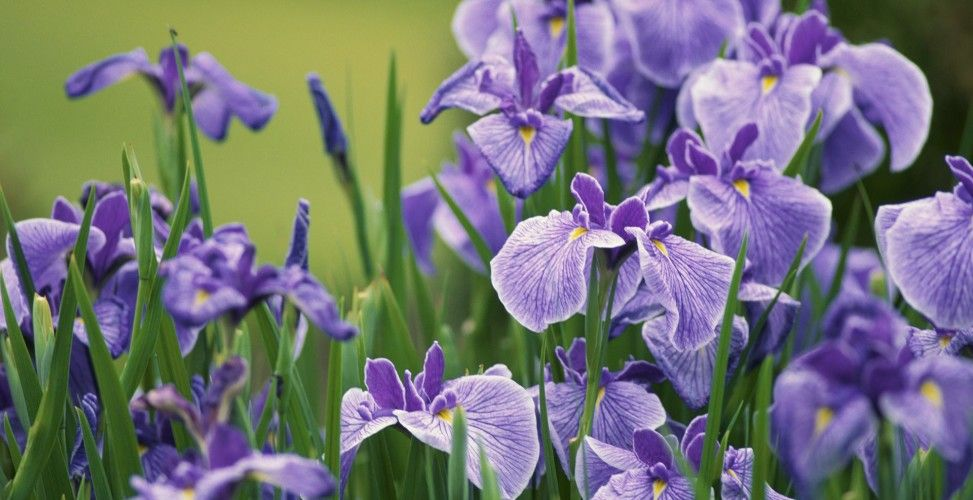
## Prediction Using Decision Tree Algorithm 
> Create the decision tree classifier and visualize it

Author: Nesrin Brahim

Date: 06-06-2023

---

### Introduction

Welcome to this notebook, where we will explore the development of a machine learning model that predicts the species (class) of a flower based on its Sepal and Petal sizes. This project is part of an internship with the Sparks Foundation, aimed at gaining practical experience in the field of data science and machine learning.


The goal of this project is to provide an accurate prediction of the species using a decision tree model. We will explore the relationship between the sepal dimesions (length&width), the petal dimensions (lengthéwidth), and the flower's species. 

By the end of this notebook, you will have a clear understanding of how to approach a classification problem using decision trees, implement a machine learning model, and evaluate its performance. Let's get started!

# **I. Import necessary librairies**

To build the classification model, we need a couple librairies. I the next cell I will import the python librairies we need for this code with mentioning why is each one needed.

In [128]:
import pandas as pd              #Data manipulation and analysis library
import numpy as np               #Linear Algebra
import matplotlib.pyplot as plt  #Plotting and data visualization
import seaborn as sns            #Statistical data visualization
print('Librairies imported succesfully')

Librairies imported succesfully


# **II. Import data** 

In [129]:
from google.colab import drive
drive.mount('/content/drive')
print('Drive mounted successfully')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive mounted successfully


In [130]:
data=pd.read_csv("/content/drive/MyDrive/TSF/#6/Dataset/Iris (1).csv")
print('Dataset imported successfully')

Dataset imported successfully


In [131]:
url="https://bit.ly/3kXTdox"
data_url=pd.read_csv(url)

- The function *'head()'* displays the first 5 rows of the dataset.
 if added a parameter n, *'head(n)'* displays the first n rows.

In [132]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# **III. Data Preprocessing**
**1. Get Info About The Data**
- The function *'info()'* gives us a summary of the Dataset's structure and information about its columns.

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


- The function *'shape'* gives the dimension of the dataset (rows,columns).

In [134]:
data.shape

(150, 6)

- The function *'describe()'* generates descriptive statistics of a DataFrame (count, mean, min, max, quatiles...).

In [135]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


**2. Check for null values, duplicates and outliers**
In order to get accurate and precise predictions, it's a wise step to check in the dataset for null values, duplicates or outliers and correct them.

In our case: 
- There is no null values.
- There are duplicates after dropping the 'ID' column.
- There are outliers in the feature : SepalWidthCm


In [136]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [137]:
data.duplicated().sum()

0

- We can see that the column 'Id' is just an index (not a primary key), it doesn't affect the target(class), so it's better to drop it.

In [138]:
data=data.drop("Id",axis=1)

In [139]:
data.duplicated().sum()

3

In [140]:
data = data.drop_duplicates()

> A box plot, is a statistical visualization that provides a concise summary of the distribution of a dataset. It displays the minimum, first quartile, median, third quartile, and maximum.
- Box plots can visually identify outliers in your data. Outliers are data points that lie significantly outside the overall pattern of the dataset. They can be indications of anomalies, errors, or interesting observations that require further investigation.

<Axes: >

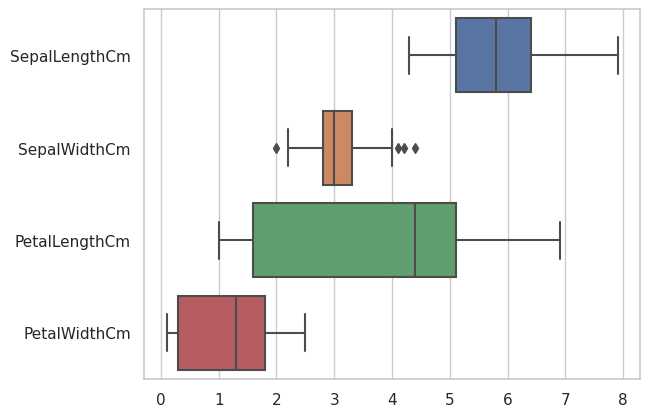

In [141]:
sns.set(style='whitegrid') 
sns.boxplot(data=data, orient='h')

> like we can see here, there are outlier values in the column SepalWidthCm, so using the following steps , I am going to delete them , for my model to be more accurate.

In [142]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [143]:
q1 = data['SepalWidthCm'].quantile(0.25)
q3 = data['SepalWidthCm'].quantile(0.75) 
IQR = q3-q1
borne_inf = q1-1.5*IQR 
borne_sup = q3 +1.5*IQR
data = data[data['SepalWidthCm']<borne_sup]
data = data[data['SepalWidthCm']>borne_inf]

<Axes: >

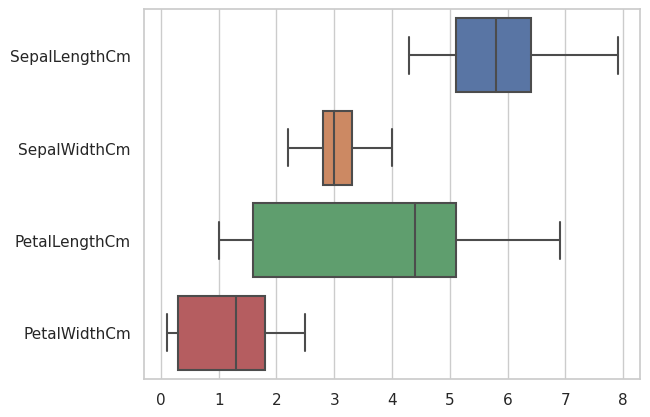

In [144]:
sns.set(style='whitegrid') 
sns.boxplot(data=data, orient='h')

> Outliers were deleted.

# **IV. Explanatory Data Analysis**




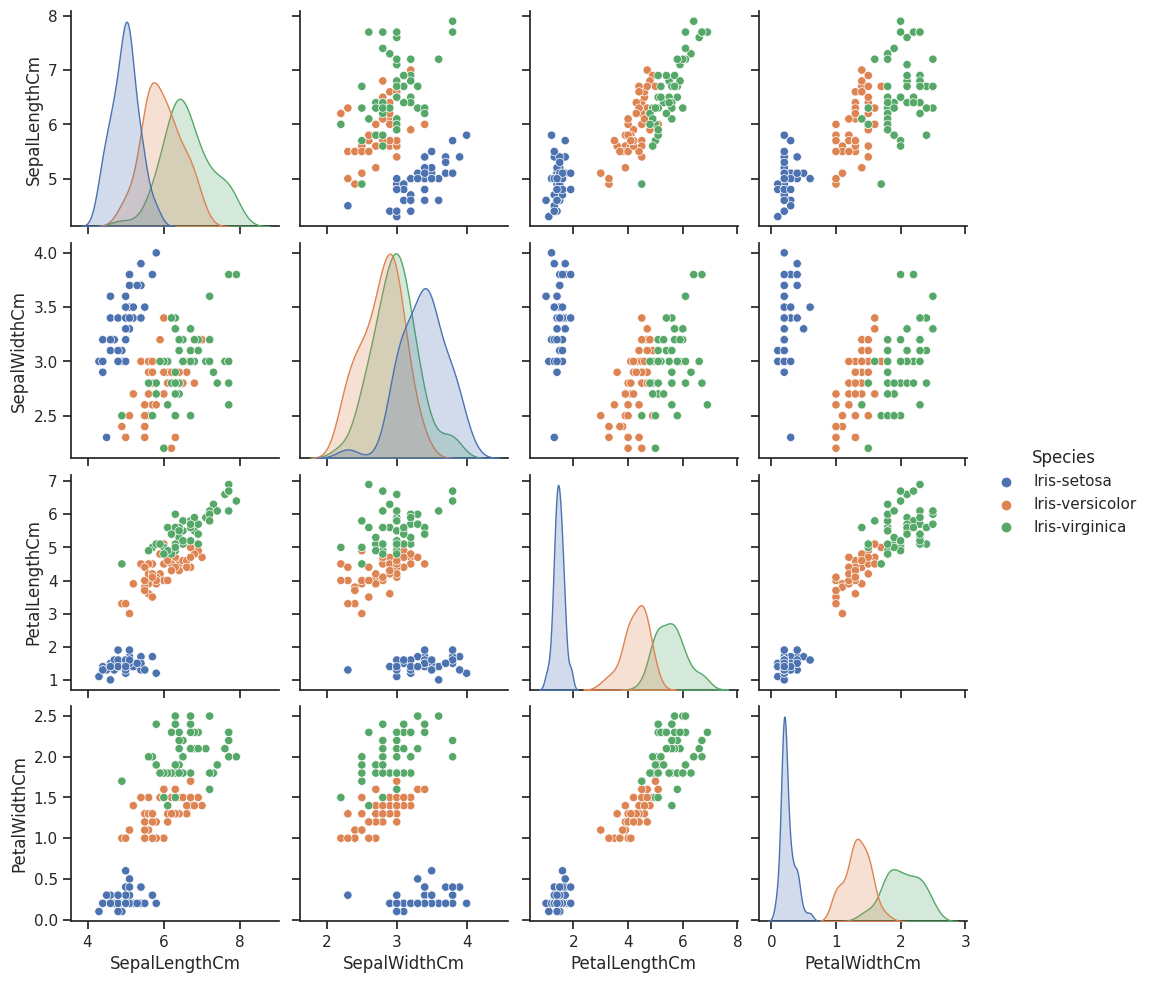

In [145]:
sns.set(style='ticks') 
sns.pairplot(data,hue='Species')

In [146]:
correlations = data.corr(method='pearson')
correlations

<ipython-input-146-df8e0168c345>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = data.corr(method='pearson')


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.113268,0.879015,0.821715
SepalWidthCm,-0.113268,1.000000,-0.396539,-0.328102
PetalLengthCm,0.879015,-0.396539,1.000000,0.960785
PetalWidthCm,0.821715,-0.328102,0.960785,1.000000


<Axes: >

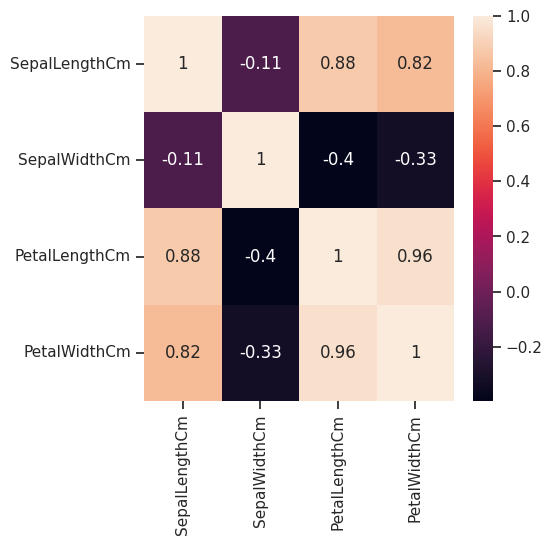

In [147]:
plt.subplots(figsize=(5,5))
sns.heatmap(correlations,annot=True)

# **V. Categorical Features Encoding**

> In machine learning, encoding refers to the process of transforming categorical or textual data into a numerical representation.

> Encoding Techniques:One-Hot Encoding, Label Encoding, Ordinal Encoding, Dummies encoding. 

- I chose to work with Label encoding in our case here, because: first, we don't have a big number of classes (just 3), and second because the categorical column is the target (I wanted to keep the problem simple: one target).

In [148]:
x=data.iloc[:, :-1]
y=data['Species']

In [149]:
data.Species.value_counts()

Iris-versicolor    49
Iris-virginica     49
Iris-setosa        45
Name: Species, dtype: int64

>**Label encoding** is a technique that assigns a unique numeric label to each category in a categorical variable. It simply maps each category to a different integer value. This encoding is useful when the categories have an inherent ordinal relationship.



In [150]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
y =label.fit_transform(y)

In [151]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# **VI. Prepare the data for training**
Now we have to split the data into training and testing data using the function **train_test_split**.

In [152]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0) 

# **VII. Training**
Now we import the **sklearn** librairy that has the **Decision Tree** algorithm that is going to help us make our model.

In [153]:
from sklearn.tree import DecisionTreeClassifier 
model=DecisionTreeClassifier(random_state=0)
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

# **VIII. Evaluation**
To evaluate the model, we can use a variety of metrics 
- Accuracy
- Precision
- Recall
- F1 Score
- Area Under the ROC Curve (AUC-ROC)

>But first we have to make the predictions, using the test data.

In [154]:
y_pred=model.predict(x_test)
y_pred

array([1, 2, 0, 1, 0, 0, 2, 2, 2, 2, 2, 1, 0, 2, 2, 0, 1, 2, 2, 0, 1, 1,
       1, 0, 1, 0, 1, 2, 0])

> The confusion matrix is a table that describes the performance of a classification model by displaying the counts of true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions.

>The utility of the confusion matrix lies in its ability to evaluate the performance of a classification model by providing more detailed information than a single accuracy score

In [155]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,classification_report
print('confusion matrix: \n')
print(confusion_matrix(y_test,y_pred))

confusion matrix: 

[[ 9  0  0]
 [ 0  7  0]
 [ 0  2 11]]


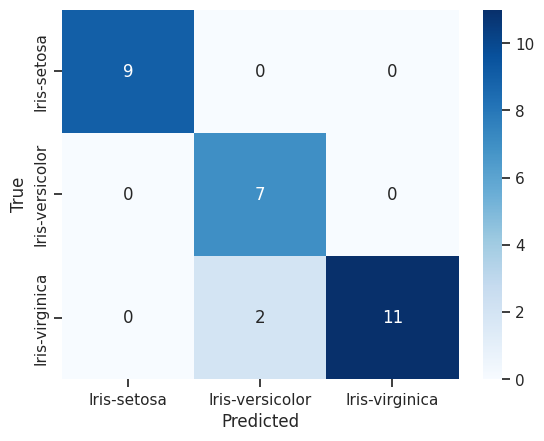

In [156]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Iris-setosa', 'Iris-versicolor','Iris-virginica']
sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [157]:
print('accuracy_score',accuracy_score(y_test,y_pred))
print('precision_score',precision_score(y_test,y_pred,average='macro'))
print('recall_score',recall_score(y_test,y_pred,average='macro'))


accuracy_score 0.9310344827586207
precision_score 0.9259259259259259
recall_score 0.9487179487179488


>The classification report is a textual summary of the key classification performance metrics for a machine learning model. It provides detailed information about the precision, recall, F1-score, and support for each class in a multi-class classification problem.

In [158]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.78      1.00      0.88         7
           2       1.00      0.85      0.92        13

    accuracy                           0.93        29
   macro avg       0.93      0.95      0.93        29
weighted avg       0.95      0.93      0.93        29



# **Decision Tree Visualization**

>The visualization of a decision tree involves creating a graphical or text representation of the decision-making process within the tree-based machine learning algorithm. It provides an intuitive and interpretable representation of how the algorithm makes decisions and splits the data based on feature conditions

- The function *'export_text'* gives a text representation of the descision tree:

In [159]:
from sklearn import tree
feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
class_names = ['Iris-setosa', 'Iris-versicolor','Iris-virginica']
text_representation = tree.export_text(model, feature_names=feature_names)
print(text_representation)

|--- PetalWidthCm <= 0.80
|   |--- class: 0
|--- PetalWidthCm >  0.80
|   |--- PetalWidthCm <= 1.75
|   |   |--- PetalLengthCm <= 5.35
|   |   |   |--- SepalLengthCm <= 4.95
|   |   |   |   |--- PetalWidthCm <= 1.35
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- PetalWidthCm >  1.35
|   |   |   |   |   |--- class: 2
|   |   |   |--- SepalLengthCm >  4.95
|   |   |   |   |--- class: 1
|   |   |--- PetalLengthCm >  5.35
|   |   |   |--- class: 2
|   |--- PetalWidthCm >  1.75
|   |   |--- PetalLengthCm <= 4.85
|   |   |   |--- SepalLengthCm <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- SepalLengthCm >  5.95
|   |   |   |   |--- class: 2
|   |   |--- PetalLengthCm >  4.85
|   |   |   |--- class: 2



- The function *'plot_tree'* gives a graphical representation of the descision tree:

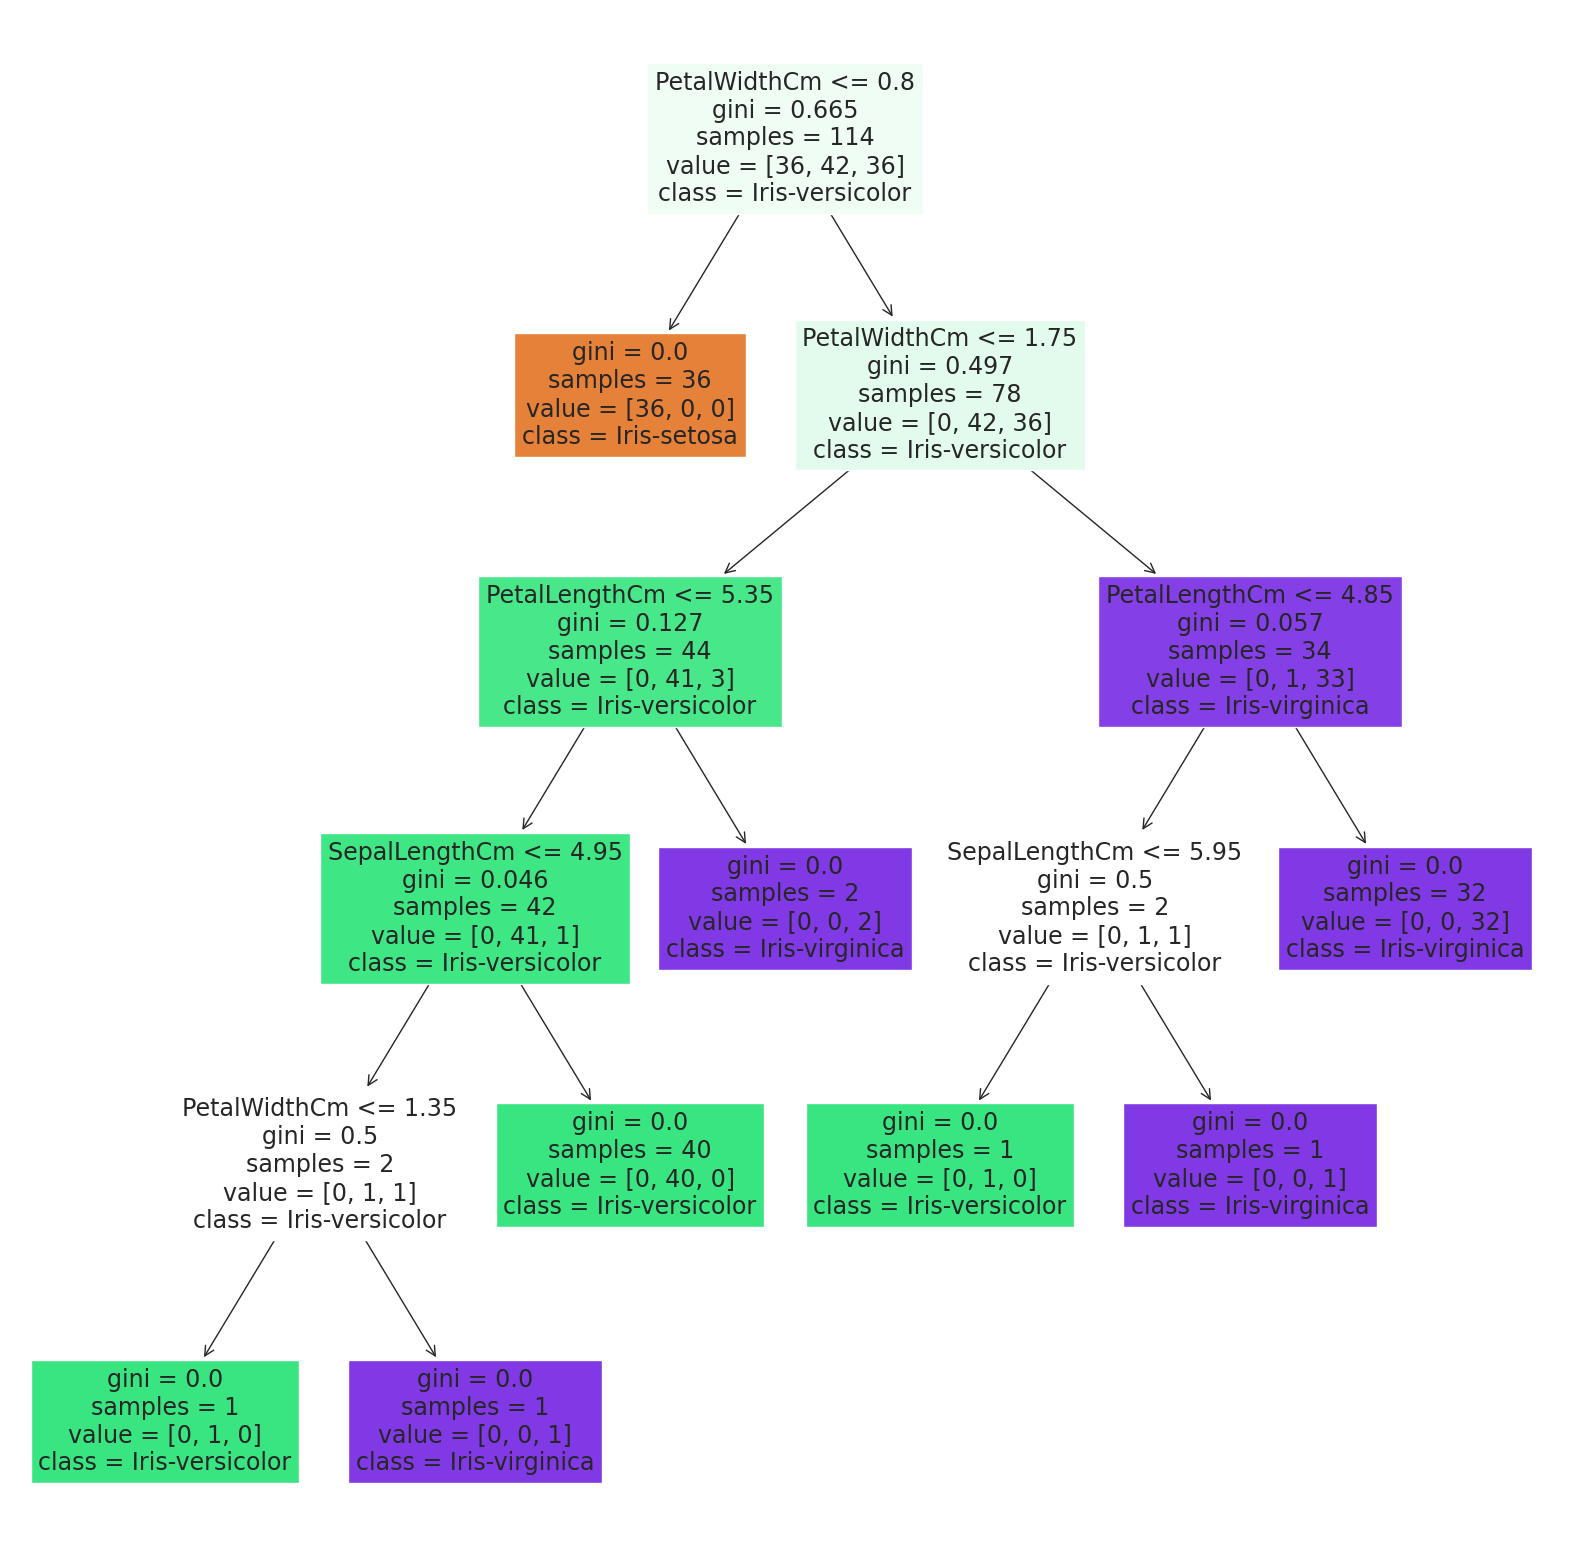

In [160]:

fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(model, 
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)